In [126]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Understanding what the columns mean
Column names:

    ID = unique id number
    title = song’s title
    artist = song’s artist
    top genre = the genre of the track
    year = song’s year in the billboard
    bpm = beats per minute (tempo)
    nrgy = energy, the higher the value the more energetic the song
    dnce = danceability, the higher the value the easier it is to dance to
    db = loudness, the higher the value the louder the song
    live = the higher the value the more likely the song is a live recording
    val = valence, the higher the value the more positive the mood
    dur = duration of the song
    acous = acousticness, the higher the value the more acoustic the song is
    spch = speechiness, the higher the value the more spoken word the song contains
    pop = popularity, the higher the value the more popular the song is


## reading each of the csv files

In [127]:
df_2010= pd.read_csv('2010.csv')
df_2011=pd.read_csv('2011.csv')
df_2012=pd.read_csv('2012.csv')
df_2013= pd.read_csv('2013.csv')
df_2014= pd.read_csv('2014.csv')
df_2015=pd.read_csv('2015.csv')
df_2016= pd.read_csv('2016.csv')
df_2017= pd.read_csv('2017.csv')
df_2018= pd.read_csv('2018.csv')
df_2019= pd.read_csv('2019.csv')


In [128]:
df_2010.shape



(51, 15)

In [129]:
df_2011.shape

(53, 15)

In [130]:
df_2012.shape

(35, 15)

In [131]:
df_2013.shape

(71, 15)

In [132]:
df_2014.shape

(58, 15)

In [133]:
df_2015.shape

(95, 15)

In [134]:
df_2016.shape

(80, 15)

In [135]:
df_2017.shape

(65, 15)

In [136]:
df_2018.shape

(64, 15)

In [137]:
df_2019.shape

(31, 15)

In [138]:
# combine all datasets
all_top_songs=pd.concat([df_2010, df_2011, df_2012, df_2013,df_2014, df_2015, df_2016, df_2017, df_2018, df_2019])

In [139]:
all_top_songs.shape



(603, 15)

In [140]:
# cleaning the datasets
 ## Clean the dataset to make sure the following columns are either integer or floats and not objects:
"""
    id
    year
    bpm
    nrgy
    dnce
    db
    live
    val
    dur
    acous
    spch
    pop

"""
pd.set_option('display.max_columns',15)
all_top_songs


# saving to a csv
all_top_songs.to_csv('top_spotify_songs.csv', index=False)

In [141]:
#checking current data types
all_top_songs.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [142]:



all_top_songs.infer_objects().dtypes


Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [143]:
# transforming this columsn into either integers or floats


"""
 id
    year
    bpm
    nrgy
    dnce
    db
    live
    val
    dur
    acous
    spch
    pop

    """

'\n id\n    year\n    bpm\n    nrgy\n    dnce\n    db\n    live\n    val\n    dur\n    acous\n    spch\n    pop\n\n    '

In [144]:
all_top_songs.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [145]:
all_top_songs.rename({'Unnamed: ':'ID'},inplace=True)
all_top_songs

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
27,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
28,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
29,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


## Questions

1. What is the most popular song in the dataset?   
   

the most popular song in the database is Memories  by Maroon 5 with a popularity value of 99 


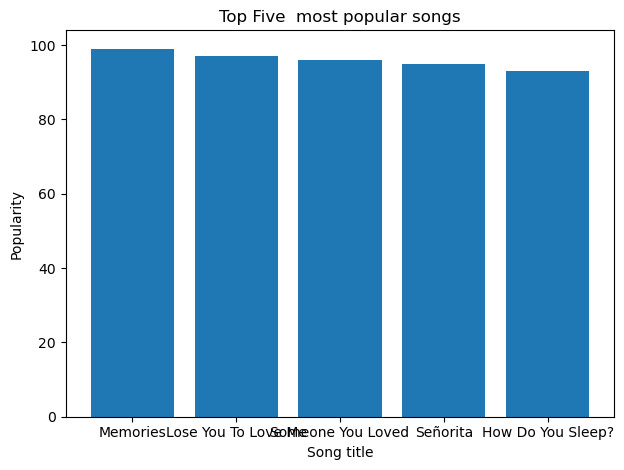

In [146]:
# select the  title and pop  columns

popularity=all_top_songs[['title','pop', 'artist']]
#find the maximum value for the  pop column
max_pop=all_top_songs['pop'].max()

top_song=popularity.loc[(popularity['pop']==max_pop)]
for element in top_song.iterrows():
    title=element[1]['title']
    popular= element[1]['pop']
    artist=element[1]['artist']



sorted_popularity=popularity.sort_values('pop', ascending=False)
top_five_songs= sorted_popularity.head(5)
print(f"the most popular song in the database is {title}  by {artist} with a popularity value of {popular} ")
top_five_songs

plt.title('Top Five  most popular songs')
plt.bar(top_five_songs['title'],top_five_songs['pop'] )
plt.xlabel('Song title')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()



2. What artist has the most songs in the dataset?

In [147]:

#select the artist and title columns from the database
artist_and_song=all_top_songs[['artist','title']]

#let's group them by artists
grouped_artists=artist_and_song.groupby('artist')
#let's count
count_all_artists=grouped_artists.count()
sorted_artists=count_all_artists.sort_values('title', ascending=False)
max_artists=sorted_artists.max()
top_artist=sorted_artists.loc[sorted_artists.title==max_artists.title]
for element in top_artist.iterrows():
    top_name=element[0]
    top_total=element[1]['title']

sorted_artists

print(f'The artist who has the most songs in the dataset is {top_name} with {top_total} songs in the dataset')
#top_artist

The artist who has the most songs in the dataset is Katy Perry with 17 songs in the dataset


3. What is the most popular genre of music in the dataset?

In [148]:
all_genres=all_top_songs[['top genre', 'pop']]
max_pop=all_genres['pop'].max()
top_genre= all_genres.loc[(all_genres['pop']==max_pop)]


print(f"the top genre is {top_genre['top genre'][0]} with a popularity of {top_genre['pop'][0]}")



    






the top genre is pop with a popularity of 99


4. Are there any songs in the dataset more than once?
   

In [149]:
dupes=all_top_songs[all_top_songs.duplicated(('title', 'artist'))]
titles=dupes['title']
print('Yes, there are songs in the dataset mroe than once. which are the following:')
for index, element in enumerate(titles):
    print()
    
    print(index+1,element)






Yes, there are songs in the dataset mroe than once. which are the following:

1 Just the Way You Are

2 Marry You

3 Written in the Stars (feat. Eric Turner)

4 Castle Walls (feat. Christina Aguilera)

5 We Are Never Ever Getting Back Together

6 A Little Party Never Killed Nobody (All We Got)

7 Sugar

8 The Hills

9 Love Yourself

10 Stitches

11 Company

12 Runnin' (Lose It All)

13 Here

14 All I Ask

15 First Time

16 Kissing Strangers


5. Is there a relationship between popularity and danceability?

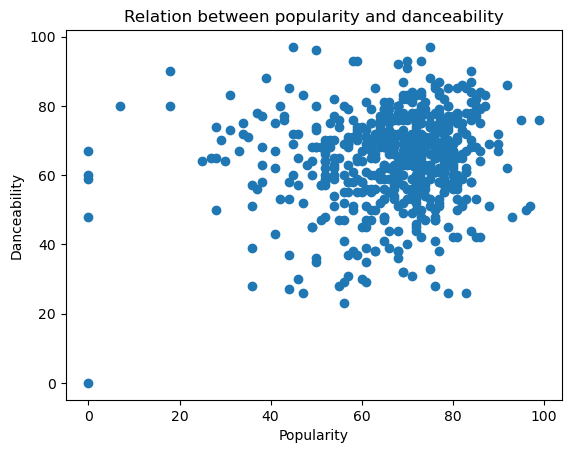

the pearson correlationship coefficient is 0.1160544446144213, indicating a weak relationship


In [150]:
popu_and_dance=all_top_songs[['pop', 'dnce']]

popu=all_top_songs['pop']
dance=all_top_songs['dnce']

corr = popu_and_dance.corr(method = 'pearson')


plt.scatter(popu, dance)
plt.title('Relation between popularity and danceability')
plt.xlabel('Popularity')
plt.ylabel('Danceability')


plt.show()

print(f'the pearson correlationship coefficient is {corr['pop'].iloc[1]}, indicating a weak relationship')
    


6. Does having a higher bpm lead to having a higher energy score?

the pearson correlation coefficient is 0.13
which indicates a weak relationship between the bpm and energy
and it can be visualized by both the scatter plot which shows no clear relationship and the line plot
which shows that while it sometimes happens that some values in both variables are high, it is not always the case



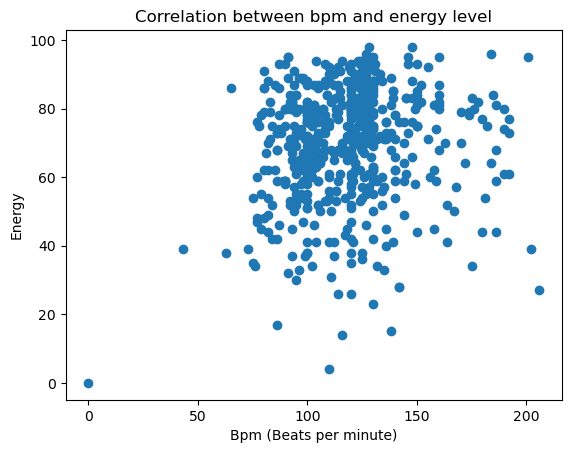

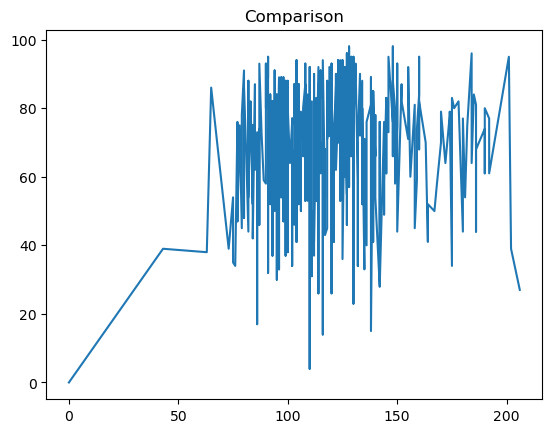

In [151]:
nrgy_and_bpm=all_top_songs[['bpm','nrgy']]
nrgy_and_bpm
sorted_bpm=nrgy_and_bpm.sort_values('bpm',ascending=True)
corr2 = sorted_bpm.corr(method = 'pearson')

print(f"""the pearson correlation coefficient is {corr2['nrgy'].iloc[0]:.2f}
which indicates a weak relationship between the bpm and energy
and it can be visualized by both the scatter plot which shows no clear relationship and the line plot
which shows that while it sometimes happens that some values in both variables are high, it is not always the case
""")
     

plt.scatter(sorted_bpm['bpm'], sorted_bpm['nrgy'])
plt.title('Correlation between bpm and energy level')
plt.xlabel('Bpm (Beats per minute)')
plt.ylabel('Energy')
plt.show()
plt.plot(sorted_bpm['bpm'], sorted_bpm['nrgy'])
plt.title('Comparison')
plt.show()





#print(fThe correlation


7. Which genre has the highest energy score?

In [153]:
genre_highest_energy=all_top_songs[['top genre','nrgy']]
grouped_genres=genre_highest_energy.groupby('top genre')
mean_grouped_genres=grouped_genres.mean()
max_mean=mean_grouped_genres.max()
top_energized_genre=mean_grouped_genres.loc[(mean_grouped_genres.nrgy==max_mean.nrgy)]
top_energized_genre.items()
for element in top_energized_genre.iterrows():
    top_energetic=element[0]
    top_energy=element[1]['nrgy']







#max_energy=genre_highest_energy['nrgy'].max()
#energized_genre=genre_highest_energy.loc[genre_highest_energy['nrgy']==max_energy]

#energized_genre.iloc[1]


print(f'The genre with the highest energy score is {top_energetic} with an energy score of {top_energy}')







The  genre with the highest energy score is french indie pop energy score of 89.0
